In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/Customer.csv
/kaggle/input/Transactions.csv
/kaggle/input/prod_cat_info.csv


Importing all necessary packages 

* numpy & pandas for data analysis

* matplotlip and seaborn for visualisation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the datasets in to pandas dataframe

In [3]:
cust=pd.read_csv('../input/Customer.csv')
trans=pd.read_csv('../input/Transactions.csv')
prod=pd.read_csv('../input/prod_cat_info.csv')

Viewing the datasets

In [4]:
cust.head(1)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0


In [5]:
trans.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop


In [6]:
prod.head(1)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens


In [7]:
print('customer    :',cust.shape)
print('transaction :',trans.shape)
print('products    :',prod.shape)

customer    : (5647, 4)
transaction : (23053, 10)
products    : (23, 4)


### 1. Merging the datasets

In [8]:
a=pd.merge(cust,trans,left_on='customer_Id',right_on='cust_id',how='right')

In [9]:
a.shape

(23053, 14)

As above the dataframe on right is the one which has details of successful transactions, **Right Join** has been preferred to be the type of join for the below mentioned reasons:

* our aim is to have all those customers who have succesfully done transactions, and the dataframe-"trans" on right has all such customers

    * hence right join gives us only those data where customers have carried out any transaction succeessfully


* whereas the cust dataset on left, has details of those customers also who haven't carried out any transaction, 
    
    * if we had taken outer or left join, then we would have got too many null values, corresponding to customers who haven't done any transaction

In [10]:
customer_final=pd.merge(a,prod,left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'],how='outer')

In [11]:
customer_final.shape

(23053, 17)

In [12]:
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
5,274630,01-02-1970,M,4.0,78357345891,274630,11/4/2012,7,5,1,646,67.830,713.830,TeleShop,Books,7,Fiction
6,273541,01-02-1970,M,4.0,23916816961,273541,9/2/2013,7,5,4,410,172.200,1812.200,e-Shop,Books,7,Fiction
7,269008,13-02-1970,F,6.0,35560569829,269008,9/3/2013,7,5,1,1441,151.305,1592.305,e-Shop,Books,7,Fiction
8,269008,13-02-1970,F,6.0,94033312891,269008,26-04-2012,7,5,5,746,391.650,4121.650,MBR,Books,7,Fiction
9,267199,14-02-1970,NaN,2.0,56749259881,267199,11/1/2012,7,5,4,1049,440.580,4636.580,MBR,Books,7,Fiction


In [13]:
customer_final.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

After merging there are several columns that are repeating, hence it is logical to remove those redundant columns
* these columns are :

    * cust_id
    * prod_sub_cat_code

In [14]:
customer_final.drop(columns=['cust_id','prod_sub_cat_code'],inplace=True)

In [17]:
customer_final.head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction


In [18]:
pd.Series(customer_final.columns)

0          customer_Id
1                  DOB
2               Gender
3            city_code
4       transaction_id
5            tran_date
6     prod_subcat_code
7        prod_cat_code
8                  Qty
9                 Rate
10                 Tax
11           total_amt
12          Store_type
13            prod_cat
14         prod_subcat
dtype: object

In [19]:
#re-arranging the columns for ease of understanding & viewig

customer_final=customer_final.iloc[:,[0,1,2,3,4,5,12,13,14,7,6,8,9,10,11]]

## 2. Summary report

### 2.a

In [20]:
# columns along with their data types

pd.Series(index=customer_final.columns,data=customer_final.dtypes)

customer_Id           int64
DOB                  object
Gender               object
city_code           float64
transaction_id        int64
tran_date            object
Store_type           object
prod_cat             object
prod_subcat          object
prod_cat_code         int64
prod_subcat_code      int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
dtype: object

In [21]:
# .info() method also works for this, it gives the no. of non-null values along with data type
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 15 columns):
customer_Id         23053 non-null int64
DOB                 23053 non-null object
Gender              23044 non-null object
city_code           23045 non-null float64
transaction_id      23053 non-null int64
tran_date           23053 non-null object
Store_type          23053 non-null object
prod_cat            23053 non-null object
prod_subcat         23053 non-null object
prod_cat_code       23053 non-null int64
prod_subcat_code    23053 non-null int64
Qty                 23053 non-null int64
Rate                23053 non-null int64
Tax                 23053 non-null float64
total_amt           23053 non-null float64
dtypes: float64(3), int64(6), object(6)
memory usage: 2.8+ MB


### 2.b

In [22]:
#first 10 observations using .head()
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,Store_type,prod_cat,prod_subcat,prod_cat_code,prod_subcat_code,Qty,Rate,Tax,total_amt
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,TeleShop,Books,Fiction,5,7,5,187,98.175,1033.175
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,e-Shop,Books,Fiction,5,7,2,464,97.440,1025.440
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,Flagship store,Books,Fiction,5,7,2,197,41.370,435.370
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,e-Shop,Books,Fiction,5,7,4,1141,479.220,5043.220
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,e-Shop,Books,Fiction,5,7,4,1020,428.400,4508.400
5,274630,01-02-1970,M,4.0,78357345891,11/4/2012,TeleShop,Books,Fiction,5,7,1,646,67.830,713.830
6,273541,01-02-1970,M,4.0,23916816961,9/2/2013,e-Shop,Books,Fiction,5,7,4,410,172.200,1812.200
7,269008,13-02-1970,F,6.0,35560569829,9/3/2013,e-Shop,Books,Fiction,5,7,1,1441,151.305,1592.305
8,269008,13-02-1970,F,6.0,94033312891,26-04-2012,MBR,Books,Fiction,5,7,5,746,391.650,4121.650
9,267199,14-02-1970,NaN,2.0,56749259881,11/1/2012,MBR,Books,Fiction,5,7,4,1049,440.580,4636.580


In [23]:
#last 10 observations using .tail()
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,Store_type,prod_cat,prod_subcat,prod_cat_code,prod_subcat_code,Qty,Rate,Tax,total_amt
23043,268914,15-11-1992,F,3.0,1407823655,10/6/2011,MBR,Books,Non-Fiction,5,10,1,1252,131.460,1383.460
23044,269519,17-11-1992,M,9.0,29719500605,24-12-2013,TeleShop,Books,Non-Fiction,5,10,4,1036,435.120,4579.120
23045,273524,25-11-1992,F,1.0,25762805863,19-11-2012,Flagship store,Books,Non-Fiction,5,10,1,1401,147.105,1548.105
23046,272141,02-12-1992,F,10.0,71337087467,22-07-2012,e-Shop,Books,Non-Fiction,5,10,-3,-1422,447.930,-4713.930
23047,272141,02-12-1992,F,10.0,71337087467,16-07-2012,e-Shop,Books,Non-Fiction,5,10,3,1422,447.930,4713.930
23048,267812,04-12-1992,F,1.0,63540378797,10/10/2012,TeleShop,Books,Non-Fiction,5,10,3,224,70.560,742.560
23049,274618,09-12-1992,F,7.0,71793203305,17-08-2013,Flagship store,Books,Non-Fiction,5,10,4,691,290.220,3054.220
23050,268097,15-12-1992,F,7.0,91217108818,1/2/2012,e-Shop,Books,Non-Fiction,5,10,2,411,86.310,908.310
23051,268097,15-12-1992,F,7.0,90114483354,31-01-2011,e-Shop,Books,Non-Fiction,5,10,-4,-1408,591.360,-6223.360
23052,268097,15-12-1992,F,7.0,90114483354,26-01-2011,e-Shop,Books,Non-Fiction,5,10,4,1408,591.360,6223.360


### 2.c

In [24]:
# 5-point analysis using .describe()

customer_final.describe()

,customer_Id,city_code,transaction_id,prod_cat_code,prod_subcat_code,Qty,Rate,Tax,total_amt
count,23053.000000,23045.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,271021.746497,5.482534,5.007348e+10,3.763632,6.149091,2.432395,636.369713,248.667192,2107.308002
std,2431.692059,2.863499,2.898194e+10,1.677016,3.726372,2.268406,622.363498,187.177773,2507.561264
min,266783.000000,1.000000,3.268991e+06,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,268935.000000,3.000000,2.493864e+10,2.000000,3.000000,1.000000,312.000000,98.280000,762.450000
50%,270980.000000,5.000000,5.009313e+10,4.000000,5.000000,3.000000,710.000000,199.080000,1754.740000
75%,273114.000000,8.000000,7.533000e+10,5.000000,10.000000,4.000000,1109.000000,365.715000,3569.150000
max,275265.000000,10.000000,9.998755e+10,6.000000,12.000000,5.000000,1500.000000,787.500000,8287.500000


### 2.d

In [25]:
# describing categorical vars
customer_final.select_dtypes('object').describe()

,DOB,Gender,tran_date,Store_type,prod_cat,prod_subcat
count,23053,23044,23053,23053,23053,23053
unique,3987,2,1129,4,6,18
top,27-12-1988,M,13-07-2011,e-Shop,Books,Women
freq,32,11811,35,9311,6069,3048


In [26]:
#generating frequency tables

def freqs(a):
    print(a.value_counts(),'\n')

customer_final[['Gender','Store_type','prod_cat','prod_subcat']].apply(freqs)

M    11811
F    11233
Name: Gender, dtype: int64 

e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64 

Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64 

Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Mobiles                1031
Comics                 1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64 



Gender         None
Store_type     None
prod_cat       None
prod_subcat    None
dtype: object

## 3. Plots

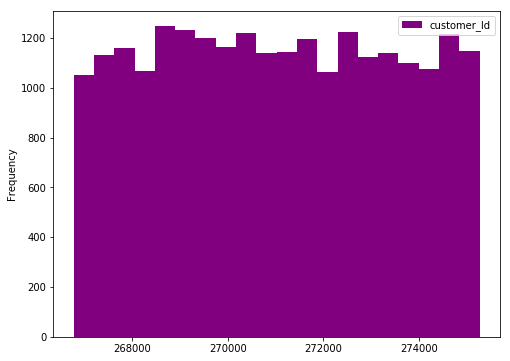

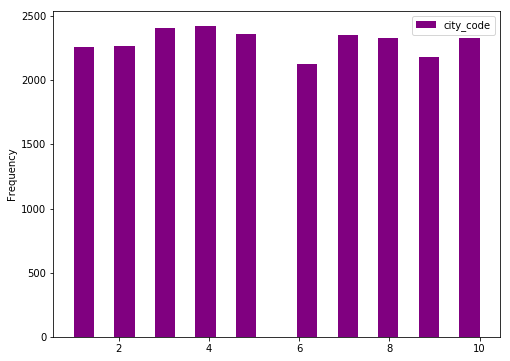

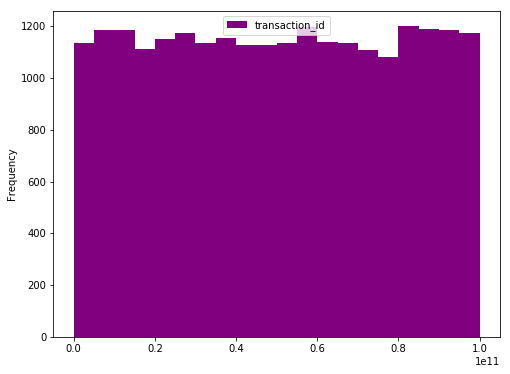

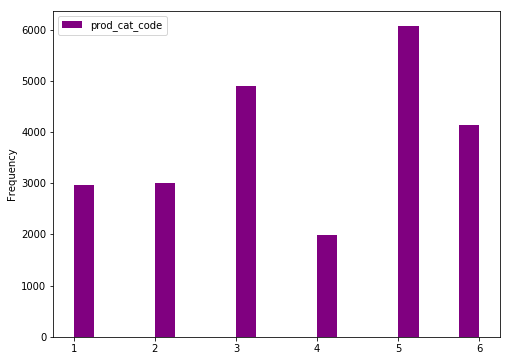

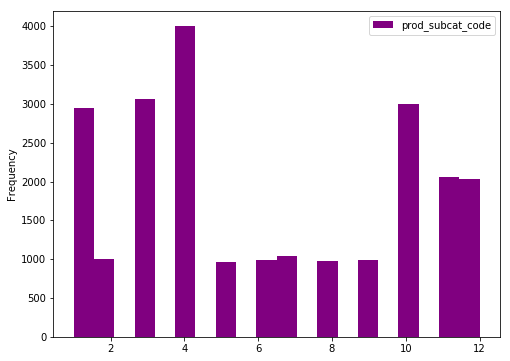

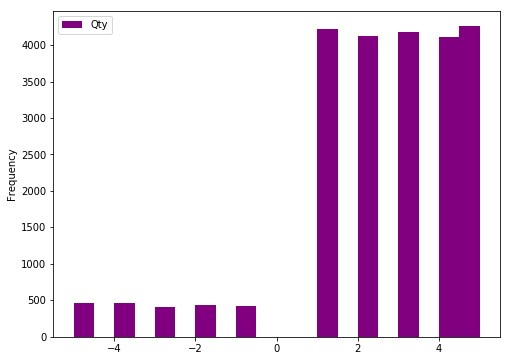

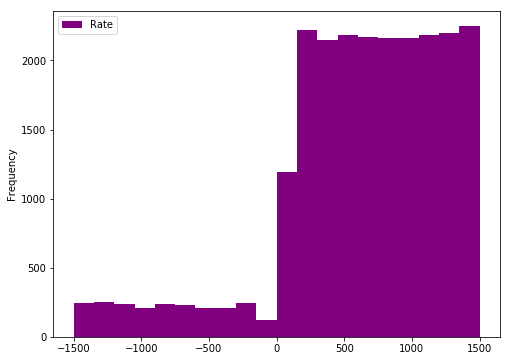

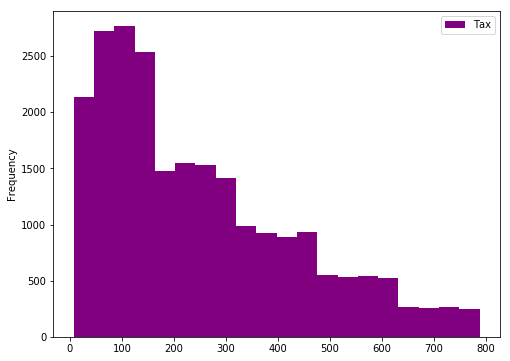

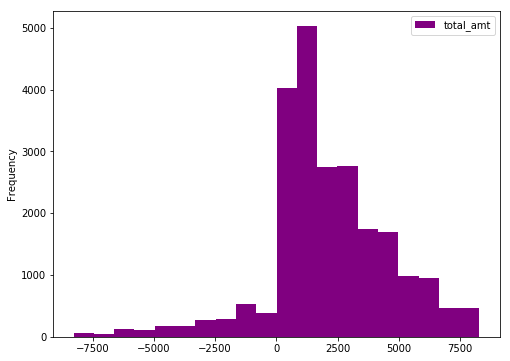

customer_Id         None
city_code           None
transaction_id      None
prod_cat_code       None
prod_subcat_code    None
Qty                 None
Rate                None
Tax                 None
total_amt           None
dtype: object

In [27]:
#plotting histograms for numeric variables

def plotter(a):           # user defined funciton to plot numeric vars.
    plt.figure(figsize=(8,6))
    a.plot(kind='hist',bins=20,color='purple')
    plt.legend()
    plt.show()

    
customer_final.select_dtypes(exclude='object').apply(plotter)


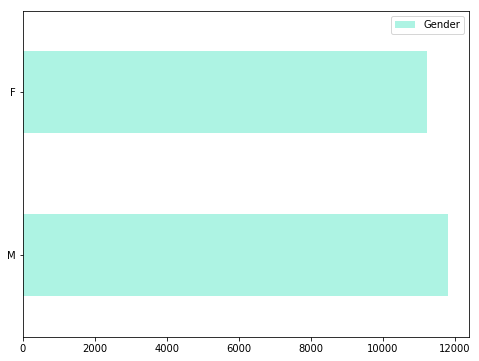

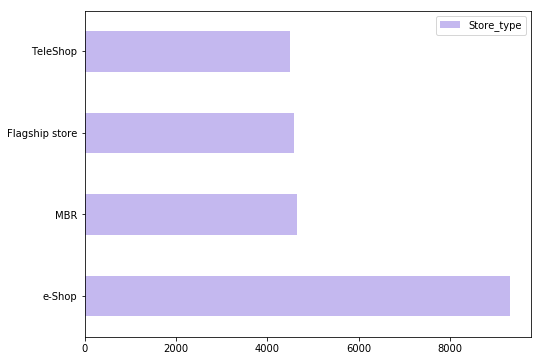

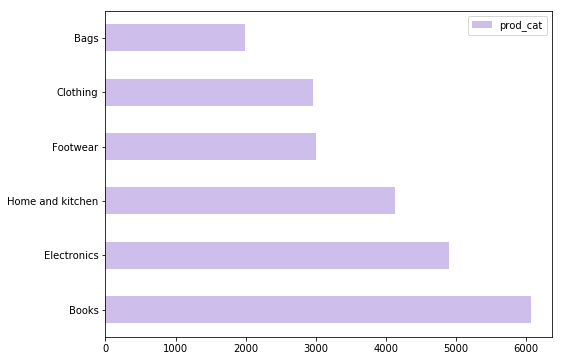

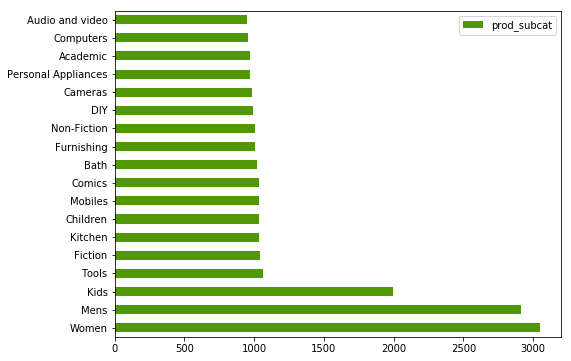

Gender         None
Store_type     None
prod_cat       None
prod_subcat    None
dtype: object

In [28]:
#frequency plots for categorical vars

def cplotter(b):                 # user defined functions for plotting categorical vars
    plt.figure(figsize=(8,6))
    b.value_counts().plot(kind='barh',color=np.random.rand(3,))
    plt.legend()
    plt.show()
    

customer_final[['Gender','Store_type','prod_cat','prod_subcat']].apply(cplotter)

## 4. Aggregation

### 4.a

In [29]:
customer_final['tran_date'].head()

0    13-01-2014
1    25-03-2011
2    23-05-2011
3     9/12/2013
4    23-05-2013
Name: tran_date, dtype: object

In [30]:
customer_final['DOB'].head()

0    02-01-1970
1    16-01-1970
2    18-01-1970
3    22-01-1970
4    29-01-1970
Name: DOB, dtype: object

A detailed look of both transaction date and date of birth columns shows us that :

* all dates have day first, month second and year as last elements, irrespective of the format in which those are displayed.

In [31]:
#converting transaction date column to datetime format, required in further analysis

customer_final['tran_date']=pd.to_datetime(customer_final['tran_date'],dayfirst=True,yearfirst=False)

#converting date of birth column to datetime format, required in further analysis

customer_final['DOB']=pd.to_datetime(customer_final['DOB'],dayfirst=True,yearfirst=False)

In [32]:
# viewing transaction date
customer_final['tran_date'].head()

0   2014-01-13
1   2011-03-25
2   2011-05-23
3   2013-12-09
4   2013-05-23
Name: tran_date, dtype: datetime64[ns]

In [33]:
customer_final['tran_date'].shape

(23053,)

In [34]:
#get earliest date

mindate=customer_final.tran_date.min()
print(mindate)

2011-01-25 00:00:00


In [35]:
#get latest date

maxdate=customer_final.tran_date.max()
print(maxdate)

2014-02-28 00:00:00


In [36]:
#to get range

daterange=abs(mindate-maxdate)
print(daterange)

1130 days 00:00:00


The range of date is 1130 days, or ~ 3 years

### 4.b

In [37]:
customer_final[customer_final['total_amt']<0]['total_amt'].count()

2177

As seen above, there are 2177 transactions, where total amount was negative.

## 5. Analysis

In [40]:
customer_final.groupby('prod_cat').Gender.count().sort_values()

prod_cat
Bags                1998
Clothing            2957
Footwear            2998
Home and kitchen    4128
Electronics         4898
Books               6065
Name: Gender, dtype: int64

as seen above, in general, BOOKS are the most famous category among both males and females, followed by ELECTRONICS, then HOME & KITCHEN

In [41]:
customer_final.groupby('prod_cat').Gender.value_counts()

prod_cat          Gender
Bags              M         1004
                  F          994
Books             M         3116
                  F         2949
Clothing          M         1518
                  F         1439
Electronics       M         2570
                  F         2328
Footwear          F         1529
                  M         1469
Home and kitchen  M         2134
                  F         1994
Name: Gender, dtype: int64

from above, we see, among males and females, BOOKS are the most popular category, followed by Electronics for both males and females.

## 6. 

In [42]:
customer_final.groupby('city_code').customer_Id.count().sort_values(ascending=False)

city_code
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: customer_Id, dtype: int64

In [43]:
round((customer_final['city_code'].value_counts().max())*100/(customer_final['city_code'].value_counts().sum()),2)

10.51

City with city code 4 has the max customers at 2422, whcich is ~10.51% of total customer.

## 7. 

In [44]:
customer_final['Rate'].max()

1500

From above it is clear that,from the data, the maximum rate for anything sold is 1500/-

In [45]:
customer_final.groupby('Store_type').agg({'Qty':'max','Rate':'max'})

,Qty,Rate
Store_type,,
Flagship store,5,1500
MBR,5,1500
TeleShop,5,1500
e-Shop,5,1500


From above, we find that all the store types i.e. Flagship, MBR, TeleShop & e-shop have sold 5 quantities of the most expensive item which costs 1500/-

In [46]:
customer_final[(customer_final.Rate==customer_final.Rate.max())&(customer_final.Qty==5)][['Store_type','prod_cat','prod_subcat','Qty','Rate']]

,Store_type,prod_cat,prod_subcat,Qty,Rate
3184,e-Shop,Footwear,Kids,5,1500
15427,TeleShop,Home and kitchen,Furnishing,5,1500
16349,e-Shop,Footwear,Women,5,1500
21258,MBR,Electronics,Computers,5,1500


Above is a detailed look of what constituted max by value and by quantity.

## 8.

In [47]:
customer_final['prod_cat'].value_counts()

Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

In [48]:
customer_final[(customer_final['Store_type']=='Flagship store') & ((customer_final['prod_cat']=='Electronics') | (customer_final['prod_cat']=='Clothing') )]

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,Store_type,prod_cat,prod_subcat,prod_cat_code,prod_subcat_code,Qty,Rate,Tax,total_amt
4095,274630,1970-02-01,M,4.0,78531093747,2011-07-14,Flagship store,Electronics,Cameras,3,9,5,653,342.825,3607.825
4100,270986,1970-03-27,M,10.0,14352737996,2012-06-01,Flagship store,Electronics,Cameras,3,9,4,525,220.500,2320.500
4101,270780,1970-04-18,F,3.0,53978919700,2012-06-06,Flagship store,Electronics,Cameras,3,9,3,730,229.950,2419.950
4106,271031,1970-06-09,F,2.0,68291613505,2012-02-17,Flagship store,Electronics,Cameras,3,9,1,926,97.230,1023.230
4107,273162,1970-06-19,M,8.0,68867970973,2011-11-13,Flagship store,Electronics,Cameras,3,9,1,1411,148.155,1559.155
4112,267490,1970-09-09,F,4.0,34795637998,2011-06-12,Flagship store,Electronics,Cameras,3,9,4,759,318.780,3354.780
4123,266972,1970-10-21,M,7.0,62617470481,2012-01-20,Flagship store,Electronics,Cameras,3,9,2,1377,289.170,3043.170
4130,272126,1971-01-10,M,9.0,60509990308,2011-11-19,Flagship store,Electronics,Cameras,3,9,5,974,511.350,5381.350
4134,274215,1971-01-23,M,8.0,85247969409,2013-02-11,Flagship store,Electronics,Cameras,3,9,5,1431,751.275,7906.275
4137,272497,1971-03-01,M,10.0,62468757770,2013-05-30,Flagship store,Electronics,Cameras,3,9,5,425,223.125,2348.125


Displayed above is the data where the store is Flagship and the product category is Electronics and Clothing. 

In [49]:
#sum of total amt of above data.
customer_final[(customer_final['Store_type']=='Flagship store') & ((customer_final['prod_cat']=='Electronics') | (customer_final['prod_cat']=='Clothing') )].total_amt.sum()

3409559.27

## 9.

In [50]:
customer_final[(customer_final.Gender=='M')&(customer_final['prod_cat']=='Electronics')]

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,Store_type,prod_cat,prod_subcat,prod_cat_code,prod_subcat_code,Qty,Rate,Tax,total_amt
4092,268408,1970-01-02,M,4.0,56902862040,2013-01-30,e-Shop,Electronics,Cameras,3,9,5,868,455.700,4795.700
4095,274630,1970-02-01,M,4.0,78531093747,2011-07-14,Flagship store,Electronics,Cameras,3,9,5,653,342.825,3607.825
4097,272359,1970-02-19,M,4.0,81379370831,2011-12-01,e-Shop,Electronics,Cameras,3,9,2,757,158.970,1672.970
4099,271692,1970-03-07,M,5.0,54391762918,2014-01-06,TeleShop,Electronics,Cameras,3,9,3,967,304.605,3205.605
4100,270986,1970-03-27,M,10.0,14352737996,2012-06-01,Flagship store,Electronics,Cameras,3,9,4,525,220.500,2320.500
4102,272555,1970-05-03,M,1.0,97199743948,2011-11-17,MBR,Electronics,Cameras,3,9,2,863,181.230,1907.230
4103,267386,1970-05-15,M,7.0,47523844726,2011-03-24,e-Shop,Electronics,Cameras,3,9,3,1234,388.710,4090.710
4107,273162,1970-06-19,M,8.0,68867970973,2011-11-13,Flagship store,Electronics,Cameras,3,9,1,1411,148.155,1559.155
4109,268447,1970-07-14,M,NaN,50093131361,2013-05-03,TeleShop,Electronics,Cameras,3,9,5,879,461.475,4856.475
4110,267042,1970-07-23,M,8.0,51197645157,2011-06-24,e-Shop,Electronics,Cameras,3,9,1,305,32.025,337.025


above is data, where MALES have bought ELECTRONICS category products.

In [51]:
#the sum of total amount of above data is :

customer_final[(customer_final.Gender=='M')&(customer_final['prod_cat']=='Electronics')].total_amt.sum()

5703109.425

## 10. 

In [52]:
print('dim. of data with total amt -ve ',customer_final[customer_final['total_amt']<0].shape)
print('\n dim. of original data', customer_final.shape)

dim. of data with total amt -ve  (2177, 15)

 dim. of original data (23053, 15)


In [53]:
#filtering out the entries where total amt is negative

cust_fin=customer_final[customer_final['total_amt']>=0]

In [54]:
cust_fin.shape

(20876, 15)

In [55]:
len(cust_fin.transaction_id.unique())

20876

from above since length of array of unique transaction ids is same as total entries in the dataframe, it is clear that, there are no duplicates in transactions, and all transactions are unique.

In [56]:
cust_fin.customer_Id.value_counts()

272741    11
270803    11
274227    11
273014    11
266794    11
          ..
274733     1
274781     1
272707     1
275127     1
268291     1
Name: customer_Id, Length: 5506, dtype: int64

above displayed is customers who have done unique transaction

In [57]:
#customers with more than 10 unique transaction or customers with frequency>=10

(cust_fin.customer_Id.value_counts()>=10).value_counts()

False    5479
True       27
Name: customer_Id, dtype: int64

It is clear that, 27 customers have done more than 10 unique transactions.

## 11. 

In [58]:
#taking todays date (system time) as reference for calculating the date of birth
now=pd.Timestamp.today()
print(now)

2019-09-16 15:31:00.263275


In [59]:
#creating a separate age column for the time being for our analysis
#subtracting systme time from dob values and assign to above column

customer_final['age']=customer_final['DOB'].apply(lambda d :abs(d-now))

In [60]:
#the ages of customer in days
customer_final.age.head()

0   18154 days 15:31:00.263275
1   18140 days 15:31:00.263275
2   18138 days 15:31:00.263275
3   18134 days 15:31:00.263275
4   18127 days 15:31:00.263275
Name: age, dtype: timedelta64[ns]

In [64]:
#type conversion of age from days into years using astype('timedelta64[y]')
customer_final['age']=customer_final['age'].astype('timedelta64[Y]')

In [65]:
customer_final.age.head()

0    49.0
1    49.0
2    49.0
3    49.0
4    49.0
Name: age, dtype: float64

In [66]:
# filtering records- get records where age is bw 25-35
#assign filtered records to a dataframe dfa
dfa=customer_final[(customer_final['age']>25)&(customer_final['age']<35)]

In [67]:
dfa

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,Store_type,prod_cat,prod_subcat,prod_cat_code,prod_subcat_code,Qty,Rate,Tax,total_amt,age
675,267825,1984-10-16,F,9.0,18872716621,2012-03-26,e-Shop,Books,Fiction,5,7,5,503,264.075,2779.075,34.0
676,274130,1984-11-09,F,9.0,61051325893,2013-10-18,MBR,Books,Fiction,5,7,1,147,15.435,162.435,34.0
677,267610,1984-11-18,M,3.0,27072325880,2013-01-03,Flagship store,Books,Fiction,5,7,4,531,223.020,2347.020,34.0
678,270842,1984-12-07,M,2.0,48493389851,2013-10-14,Flagship store,Books,Fiction,5,7,-1,-493,51.765,-544.765,34.0
679,270842,1984-12-07,M,2.0,48493389851,2013-10-08,Flagship store,Books,Fiction,5,7,1,493,51.765,544.765,34.0
680,271414,1985-02-02,M,9.0,83648307148,2012-02-05,e-Shop,Books,Fiction,5,7,5,1399,734.475,7729.475,34.0
681,272999,1985-02-05,M,5.0,98057266303,2012-11-12,TeleShop,Books,Fiction,5,7,1,1188,124.740,1312.740,34.0
682,274047,1985-02-08,F,4.0,77902293095,2013-04-19,e-Shop,Books,Fiction,5,7,3,271,85.365,898.365,34.0
683,274047,1985-02-08,F,4.0,86582217072,2011-10-31,Flagship store,Books,Fiction,5,7,1,498,52.290,550.290,34.0
684,271981,1985-02-10,M,3.0,57938443737,2011-07-20,Flagship store,Books,Fiction,5,7,5,701,368.025,3873.025,34.0


Above is, records of customers in the age group of 25-35

### 11.a

In [68]:
dfa[(dfa['prod_cat']=='Electronics') |(dfa['prod_cat']=='Books')].head()

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,Store_type,prod_cat,prod_subcat,prod_cat_code,prod_subcat_code,Qty,Rate,Tax,total_amt,age
675,267825,1984-10-16,F,9.0,18872716621,2012-03-26,e-Shop,Books,Fiction,5,7,5,503,264.075,2779.075,34.0
676,274130,1984-11-09,F,9.0,61051325893,2013-10-18,MBR,Books,Fiction,5,7,1,147,15.435,162.435,34.0
677,267610,1984-11-18,M,3.0,27072325880,2013-01-03,Flagship store,Books,Fiction,5,7,4,531,223.020,2347.020,34.0
678,270842,1984-12-07,M,2.0,48493389851,2013-10-14,Flagship store,Books,Fiction,5,7,-1,-493,51.765,-544.765,34.0
679,270842,1984-12-07,M,2.0,48493389851,2013-10-08,Flagship store,Books,Fiction,5,7,1,493,51.765,544.765,34.0


In [69]:
dfa[(dfa['prod_cat']=='Electronics') |(dfa['prod_cat']=='Books')].total_amt.sum()

8460270.065000001

### 11.b

In [70]:
#filtering records based on date to get records bw tran date jan2014 and march2014

d1=pd.to_datetime('01-01-2014',format='%d-%m-%Y')
print(d1)
d2=pd.to_datetime('01-03-2014',format='%d-%m-%Y')
print(d2)

2014-01-01 00:00:00
2014-03-01 00:00:00


In [71]:
#records where transaction date is between 1st jan 2014 and 1st march 2014

dfa[(dfa['tran_date']>d1)&(dfa['tran_date']<d2)]

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,Store_type,prod_cat,prod_subcat,prod_cat_code,prod_subcat_code,Qty,Rate,Tax,total_amt,age
686,274991,1985-03-21,M,8.0,49916924033,2014-01-18,MBR,Books,Fiction,5,7,3,527,166.005,1747.005,34.0
724,270253,1985-12-28,M,5.0,33430226218,2014-01-23,Flagship store,Books,Fiction,5,7,4,1172,492.240,5180.240,33.0
759,268565,1986-07-02,F,4.0,11698340645,2014-01-22,e-Shop,Books,Fiction,5,7,4,295,123.900,1303.900,33.0
804,274923,1987-09-08,M,8.0,97988621875,2014-02-03,e-Shop,Books,Fiction,5,7,3,837,263.655,2774.655,32.0
805,274923,1987-09-08,M,8.0,21647178150,2014-01-29,Flagship store,Books,Fiction,5,7,5,812,426.300,4486.300,32.0
849,273731,1988-07-28,F,7.0,194354511,2014-01-20,Flagship store,Books,Fiction,5,7,4,551,231.420,2435.420,31.0
870,270535,1988-12-13,F,7.0,81750321697,2014-01-17,e-Shop,Books,Fiction,5,7,1,1430,150.150,1580.150,30.0
889,273026,1989-04-21,M,10.0,46741038644,2014-01-28,MBR,Books,Fiction,5,7,5,1163,610.575,6425.575,30.0
921,272900,1989-10-22,M,6.0,41158801039,2014-01-08,TeleShop,Books,Fiction,5,7,5,766,402.150,4232.150,29.0
951,267864,1990-11-17,M,3.0,18062786609,2014-01-03,MBR,Books,Fiction,5,7,3,623,196.245,2065.245,28.0


Above is records lying between desired transaction date.

In [72]:
dfa[(dfa['tran_date']>d1)&(dfa['tran_date']<d2)]['total_amt'].sum()

847915.1200000001